<a href="https://colab.research.google.com/github/gloriagutierrez2025/optimizaci-n-aeroportuaria/blob/main/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd


In [7]:
datos=pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [8]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [9]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

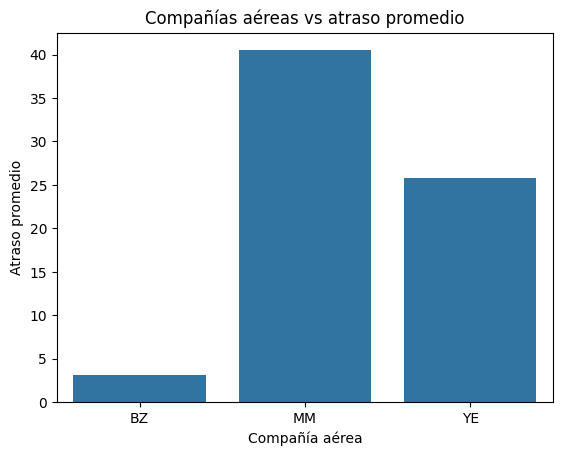

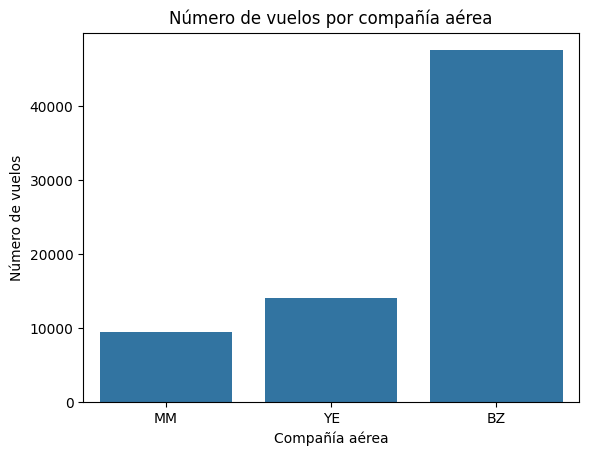

In [12]:
avg_delay=datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

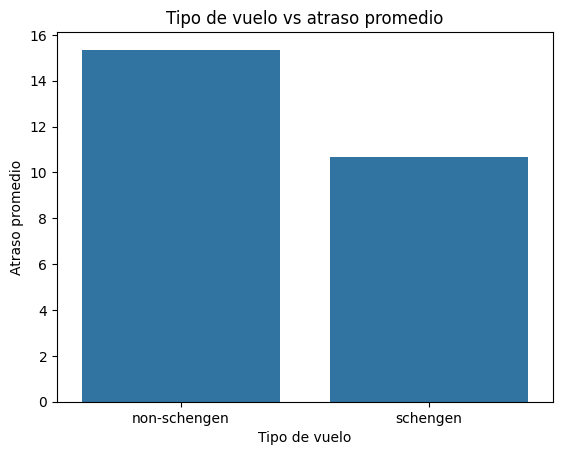

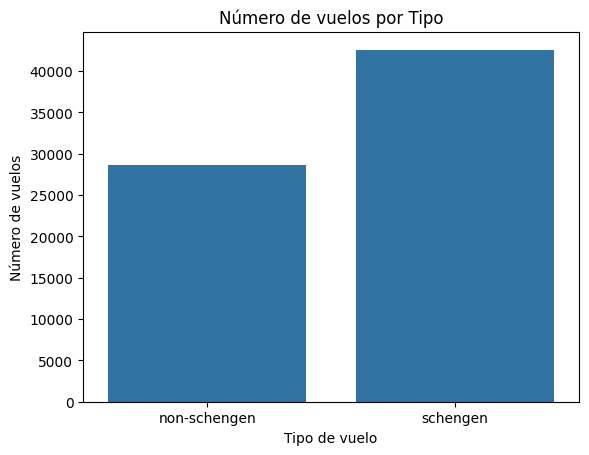

In [13]:
avg_delay=datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

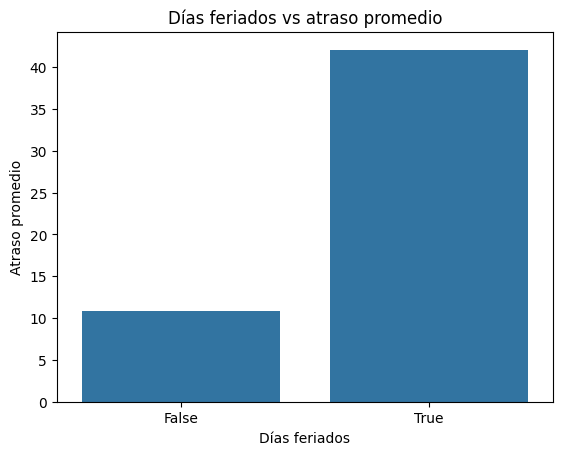

In [14]:
avg_delay=datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio')
plt.show()

In [15]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

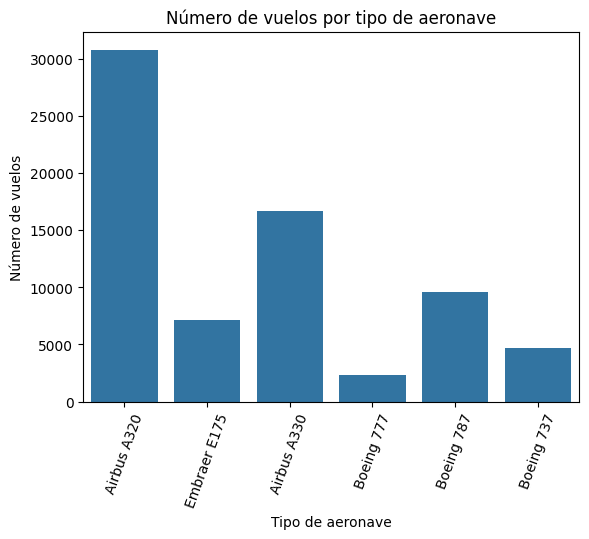

In [16]:
datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type')
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

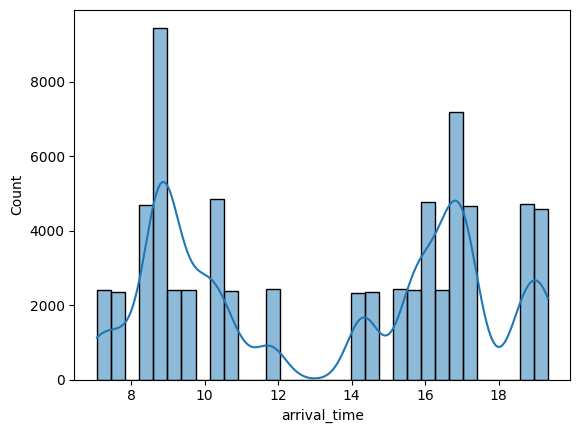

In [17]:
sns.histplot(data=datos, x='arrival_time',kde=True)


In [18]:
import numpy as np
def ancho_bin(df,columna):
    q75, q25 = np.percentile(df[columna], [75, 25])
    iqr= q75 - q25
    ancho= 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

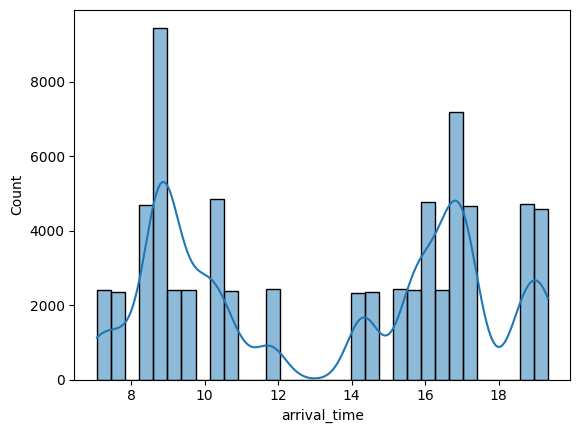

In [19]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth = binwidth)

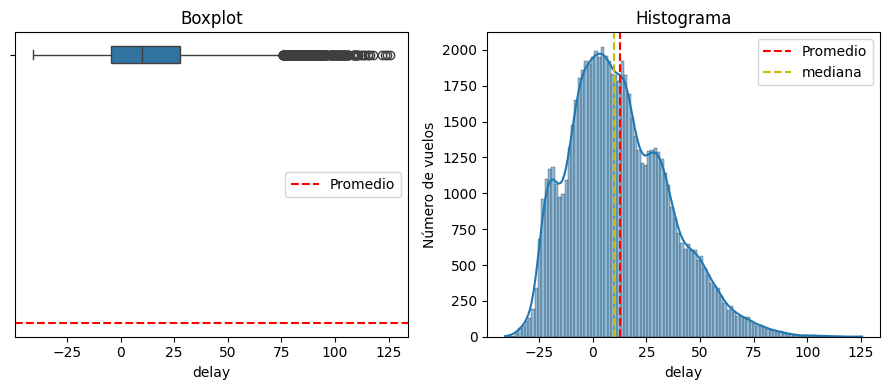

In [23]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data = datos, x='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y = atraso_promedio, color='r', linestyle='--',label='Promedio')
ax[0].legend()
binwidth=ancho_bin(datos,'delay')
sns.histplot(data = datos,x='delay',ax=ax[1], kde=True,binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio,color='r',linestyle='--',label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y',linestyle='--',label='mediana')
ax[1].legend()
plt.tight_layout()
plt.show()
